In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/utils/')
# sys.path.append('/glade/u/home/wchapman/ENSOvsMJO/utils/')
from exp_hp import get_hp

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text',usetex=True)
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Verdana']
plt.rcParams.update({'font.size': 15})
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 5))
        else:
            spine.set_color('none')
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        ax.yaxis.set_ticks([])
    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
            ax.xaxis.set_ticks([])
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.dpi'] = 150
dpiFig = 300.

In [2]:
EXP_NAME = 'default'
hps = get_hp(EXP_NAME)

LEADS = np.arange(7,31)
AVGS = np.arange(2,32)
SEEDS = np.arange(1,6)

In [3]:
# Correct & confident and correct:
model1_fracpred_corr  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
model2_fracpred_corr  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
model12_fracpred_corr = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))

model1_fracpred_confcorr  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
model2_fracpred_confcorr  = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))
model12_fracpred_confcorr = np.zeros(shape=(len(LEADS),len(AVGS),len(SEEDS)))

for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        # print('AVG: '+str(avg))
        ddir_load = '/glade/derecho/scratch/kjmayer/DATA/ENSOvsMJO/data/'
        finame_fracpred  = 'model1_fracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model1_fracpred_corr[l,a]  = np.load(ddir_load+finame_fracpred)
        finame_fracpred  = 'model2_fracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model2_fracpred_corr[l,a]  = np.load(ddir_load+finame_fracpred)
        finame_fracpred  = 'model12_fracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model12_fracpred_corr[l,a] = np.load(ddir_load+finame_fracpred)
        
        finame_fracpred = 'model1_confcorrfracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model1_fracpred_confcorr[l,a] = np.load(ddir_load+finame_fracpred)
        finame_fracpred = 'model2_confcorrfracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model2_fracpred_confcorr[l,a] = np.load(ddir_load+finame_fracpred)
        finame_fracpred = 'model12_confcorrfracpred_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model12_fracpred_confcorr[l,a] = np.load(ddir_load+finame_fracpred)

model1_corrfracpred_avg  = np.mean(model1_fracpred_corr,axis=2)
model2_corrfracpred_avg  = np.mean(model2_fracpred_corr,axis=2)
model12_corrfracpred_avg = np.mean(model12_fracpred_corr,axis=2)

model1_confcorrfracpred_avg  = np.mean(model1_fracpred_confcorr,axis=2)
model2_confcorrfracpred_avg  = np.mean(model2_fracpred_confcorr,axis=2)
model12_confcorrfracpred_avg = np.mean(model12_fracpred_confcorr,axis=2)

LEAD: 7
LEAD: 8
LEAD: 9
LEAD: 10
LEAD: 11
LEAD: 12
LEAD: 13
LEAD: 14
LEAD: 15
LEAD: 16
LEAD: 17
LEAD: 18
LEAD: 19
LEAD: 20
LEAD: 21
LEAD: 22
LEAD: 23
LEAD: 24
LEAD: 25
LEAD: 26
LEAD: 27
LEAD: 28
LEAD: 29
LEAD: 30


In [4]:
# By sign:
model1_fracpred_signconfcorr  = np.zeros(shape=(len(LEADS),len(AVGS),2,len(SEEDS)))
model2_fracpred_signconfcorr  = np.zeros(shape=(len(LEADS),len(AVGS),2,len(SEEDS)))
model12_fracpred_signconfcorr = np.zeros(shape=(len(LEADS),len(AVGS),2,len(SEEDS)))

for l,lead in enumerate(LEADS):
    print('LEAD: '+str(lead))
    for a,avg in enumerate(AVGS):
        # print('AVG: '+str(avg))
        ddir_load = '/glade/derecho/scratch/kjmayer/DATA/ENSOvsMJO/data/'

        finame_fracpred = 'model1_confcorrfracpred_bysign_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model1_fracpred_signconfcorr[l,a,0] = np.load(ddir_load+finame_fracpred)[0]
        model1_fracpred_signconfcorr[l,a,1] = np.load(ddir_load+finame_fracpred)[1]
        finame_fracpred = 'model2_confcorrfracpred_bysign_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model2_fracpred_signconfcorr[l,a,0] = np.load(ddir_load+finame_fracpred)[0]
        model2_fracpred_signconfcorr[l,a,1] = np.load(ddir_load+finame_fracpred)[1]
        finame_fracpred = 'model12_confcorrfracpred_bysign_LEAD_'+str(lead)+'_AVG_'+str(avg)+'__00001-00005.npy'
        model12_fracpred_signconfcorr[l,a,0] = np.load(ddir_load+finame_fracpred)[0]
        model12_fracpred_signconfcorr[l,a,1] = np.load(ddir_load+finame_fracpred)[1]

model1_signconfcorrfracpred_avg  = np.mean(model1_fracpred_signconfcorr,axis=-1)
model2_signconfcorrfracpred_avg  = np.mean(model2_fracpred_signconfcorr,axis=-1)
model12_signconfcorrfracpred_avg = np.mean(model12_fracpred_signconfcorr,axis=-1)

LEAD: 7
LEAD: 8
LEAD: 9
LEAD: 10
LEAD: 11
LEAD: 12
LEAD: 13
LEAD: 14
LEAD: 15
LEAD: 16
LEAD: 17
LEAD: 18
LEAD: 19
LEAD: 20
LEAD: 21
LEAD: 22
LEAD: 23
LEAD: 24
LEAD: 25
LEAD: 26
LEAD: 27
LEAD: 28
LEAD: 29
LEAD: 30


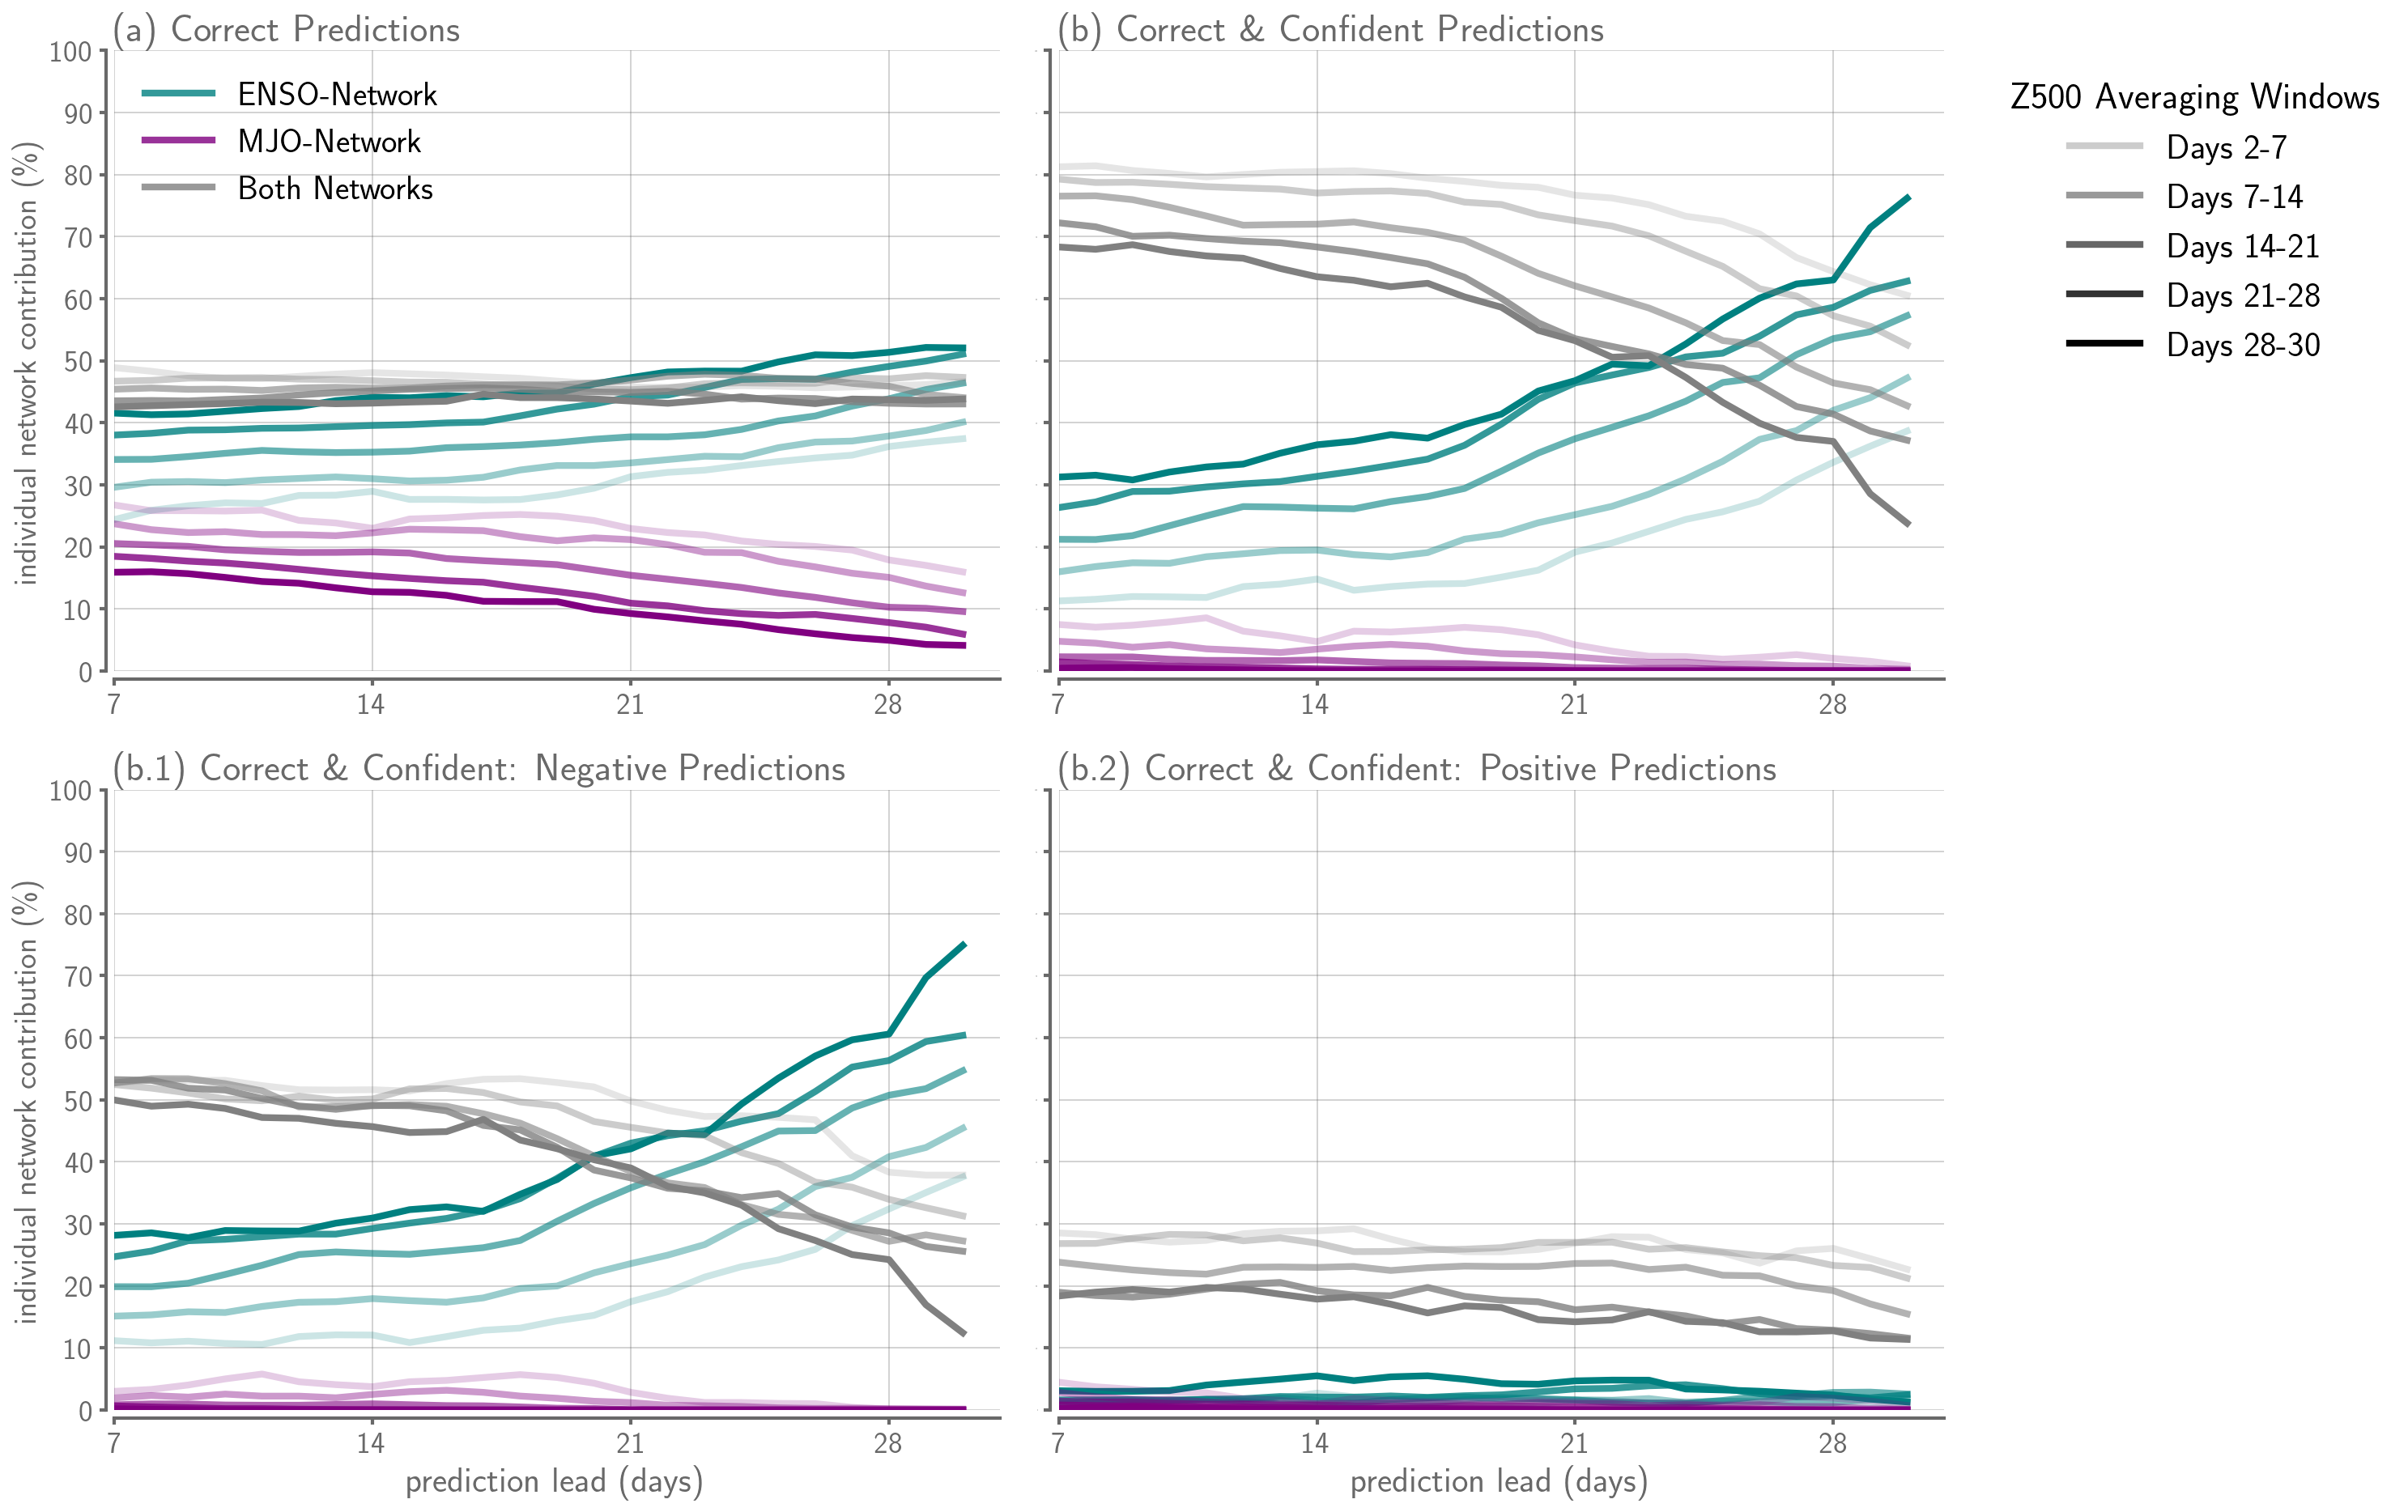

In [54]:
linewidth = 4
FS = 18

fig = plt.figure(figsize=(16,12))
ax = fig.subplot_mosaic('''
                        AC
                        BD
                        ''')
plt.tight_layout(w_pad=0,h_pad=3)
for loc in ['A','B','C','D']:   
    adjust_spines(ax[loc], ['left', 'bottom'])
    ax[loc].spines['top'].set_color('none')
    ax[loc].spines['right'].set_color('none')
    ax[loc].spines['left'].set_color('dimgrey')
    ax[loc].spines['bottom'].set_color('dimgrey')
    ax[loc].spines['left'].set_linewidth(2)
    ax[loc].spines['bottom'].set_linewidth(2)
    ax[loc].tick_params('both',length=4,width=2,which='major',color='dimgrey')
    ax[loc].yaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    ax[loc].xaxis.grid(zorder=1,color='dimgrey',alpha=0.35)
    
    ax[loc].set_ylim(0,100)
    ax[loc].set_yticks(np.arange(0,110,10))
    ax[loc].set_xlim(0,len(LEADS))
    ax[loc].set_xticks(np.arange(0,28,7))

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
    
ax['A'].plot(np.mean(model1_corrfracpred_avg[:,0:5],axis=1)*100,
                color='teal', alpha=0.2,linewidth=linewidth)
ax['A'].plot(np.mean(model1_corrfracpred_avg[:,5:12],axis=1)*100,
                color='teal', alpha=0.4,linewidth=linewidth)
ax['A'].plot(np.mean(model1_corrfracpred_avg[:,12:19],axis=1)*100,
                color='teal', alpha=0.6,linewidth=linewidth)
ax['A'].plot(np.mean(model1_corrfracpred_avg[:,19:26],axis=1)*100,
                color='teal', alpha=0.8,linewidth=linewidth,label='ENSO-Network')
ax['A'].plot(np.mean(model1_corrfracpred_avg[:,26:29],axis=1)*100,
                 color='teal', alpha=1.0,linewidth=linewidth)

ax['A'].plot(np.mean(model2_corrfracpred_avg[:,0:5],axis=1)*100,
                color='purple', alpha=0.2,linewidth=linewidth)
ax['A'].plot(np.mean(model2_corrfracpred_avg[:,5:12],axis=1)*100,
                color='purple', alpha=0.4,linewidth=linewidth)
ax['A'].plot(np.mean(model2_corrfracpred_avg[:,12:19],axis=1)*100,
                color='purple', alpha=0.6,linewidth=linewidth)
ax['A'].plot(np.mean(model2_corrfracpred_avg[:,19:26],axis=1)*100,
                color='purple', alpha=0.8,linewidth=linewidth,label='MJO-Network')
ax['A'].plot(np.mean(model2_corrfracpred_avg[:,26:29],axis=1)*100,
                 color='purple', alpha=1.0,linewidth=linewidth)


ax['A'].plot(np.mean(model12_corrfracpred_avg[:,0:5],axis=1)*100,
                color='grey', alpha=0.2,linewidth=linewidth)
ax['A'].plot(np.mean(model12_corrfracpred_avg[:,5:12],axis=1)*100,
                color='grey', alpha=0.4,linewidth=linewidth)
ax['A'].plot(np.mean(model12_corrfracpred_avg[:,12:19],axis=1)*100,
                color='grey', alpha=0.6,linewidth=linewidth)
ax['A'].plot(np.mean(model12_corrfracpred_avg[:,19:26],axis=1)*100,
                color='grey', alpha=0.8,linewidth=linewidth,label='Both Networks')
ax['A'].plot(np.mean(model12_corrfracpred_avg[:,26:29],axis=1)*100,
                 color='grey', alpha=1.0,linewidth=linewidth)

ax['A'].set_title('(a) Correct Predictions',fontsize=FS+5,color='dimgrey',loc='left')
ax['A'].set_yticklabels(np.arange(0,110,10),fontsize=FS,color='dimgrey')
ax['A'].set_ylabel('individual network contribution (\%)',fontsize=FS+1,color='dimgrey')
ax['A'].set_xticklabels(np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
ax['A'].legend(frameon=False, fontsize=FS+2,ncol=1,loc="upper left")

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
    
ax['B'].plot(np.mean(model1_signconfcorrfracpred_avg[:,0:5,0],axis=1)*100,
                color='teal', alpha=0.2,linewidth=linewidth)
ax['B'].plot(np.mean(model1_signconfcorrfracpred_avg[:,5:12,0],axis=1)*100,
                color='teal', alpha=0.4,linewidth=linewidth)
ax['B'].plot(np.mean(model1_signconfcorrfracpred_avg[:,12:19,0],axis=1)*100,
                color='teal', alpha=0.6,linewidth=linewidth)
ax['B'].plot(np.mean(model1_signconfcorrfracpred_avg[:,19:26,0],axis=1)*100,
                color='teal', alpha=0.8,linewidth=linewidth)
ax['B'].plot(np.mean(model1_signconfcorrfracpred_avg[:,26:29,0],axis=1)*100,
                 color='teal', alpha=1.0,linewidth=linewidth)

ax['B'].plot(np.mean(model2_signconfcorrfracpred_avg[:,0:5,0],axis=1)*100,
                color='purple', alpha=0.2,linewidth=linewidth)
ax['B'].plot(np.mean(model2_signconfcorrfracpred_avg[:,5:12,0],axis=1)*100,
                color='purple', alpha=0.4,linewidth=linewidth)
ax['B'].plot(np.mean(model2_signconfcorrfracpred_avg[:,12:19,0],axis=1)*100,
                color='purple', alpha=0.6,linewidth=linewidth)
ax['B'].plot(np.mean(model2_signconfcorrfracpred_avg[:,19:26,0],axis=1)*100,
                color='purple', alpha=0.8,linewidth=linewidth)
ax['B'].plot(np.mean(model2_signconfcorrfracpred_avg[:,26:29,0],axis=1)*100,
                 color='purple', alpha=1.0,linewidth=linewidth)


ax['B'].plot(np.mean(model12_signconfcorrfracpred_avg[:,0:5,0],axis=1)*100,
                color='grey', alpha=0.2,linewidth=linewidth)
ax['B'].plot(np.mean(model12_signconfcorrfracpred_avg[:,5:12,0],axis=1)*100,
                color='grey', alpha=0.4,linewidth=linewidth)
ax['B'].plot(np.mean(model12_signconfcorrfracpred_avg[:,12:19,0],axis=1)*100,
                color='grey', alpha=0.6,linewidth=linewidth)
ax['B'].plot(np.mean(model12_signconfcorrfracpred_avg[:,19:26,0],axis=1)*100,
                color='grey', alpha=0.8,linewidth=linewidth)
ax['B'].plot(np.mean(model12_signconfcorrfracpred_avg[:,26:29,0],axis=1)*100,
                 color='grey', alpha=1.0,linewidth=linewidth)


ax['B'].set_title('(b.1) Correct \& Confident: Negative Predictions',fontsize=FS+5,color='dimgrey',loc='left')
ax['B'].set_yticklabels(np.arange(0,110,10),fontsize=FS,color='dimgrey')
ax['B'].set_ylabel('individual network contribution (\%)',fontsize=FS+1,color='dimgrey')
ax['B'].set_xticklabels(np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
ax['B'].set_xlabel('prediction lead (days)',fontsize=FS+3,color='dimgrey')


# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

ax['C'].plot(np.mean(model1_confcorrfracpred_avg[:,0:5],axis=1)*100,
                color='teal', alpha=0.2,linewidth=linewidth)
ax['C'].plot(np.mean(model1_confcorrfracpred_avg[:,5:12],axis=1)*100,
                color='teal', alpha=0.4,linewidth=linewidth)
ax['C'].plot(np.mean(model1_confcorrfracpred_avg[:,12:19],axis=1)*100,
                color='teal', alpha=0.6,linewidth=linewidth)
ax['C'].plot(np.mean(model1_confcorrfracpred_avg[:,19:26],axis=1)*100,
                color='teal', alpha=0.8,linewidth=linewidth)
ax['C'].plot(np.mean(model1_confcorrfracpred_avg[:,26:29],axis=1)*100,
                 color='teal', alpha=1.0,linewidth=linewidth)

ax['C'].plot(np.mean(model2_confcorrfracpred_avg[:,0:5],axis=1)*100,
                color='purple', alpha=0.2,linewidth=linewidth)
ax['C'].plot(np.mean(model2_confcorrfracpred_avg[:,5:12],axis=1)*100,
                color='purple', alpha=0.4,linewidth=linewidth)
ax['C'].plot(np.mean(model2_confcorrfracpred_avg[:,12:19],axis=1)*100,
                color='purple', alpha=0.6,linewidth=linewidth)
ax['C'].plot(np.mean(model2_confcorrfracpred_avg[:,19:26],axis=1)*100,
                color='purple', alpha=0.8,linewidth=linewidth)
ax['C'].plot(np.mean(model2_confcorrfracpred_avg[:,26:29],axis=1)*100,
                 color='purple', alpha=1.0,linewidth=linewidth)


ax['C'].plot(np.mean(model12_confcorrfracpred_avg[:,0:5],axis=1)*100,
                color='grey', alpha=0.2,linewidth=linewidth)
ax['C'].plot(np.mean(model12_confcorrfracpred_avg[:,5:12],axis=1)*100,
                color='grey', alpha=0.4,linewidth=linewidth)
ax['C'].plot(np.mean(model12_confcorrfracpred_avg[:,12:19],axis=1)*100,
                color='grey', alpha=0.6,linewidth=linewidth)
ax['C'].plot(np.mean(model12_confcorrfracpred_avg[:,19:26],axis=1)*100,
                color='grey', alpha=0.8,linewidth=linewidth)
ax['C'].plot(np.mean(model12_confcorrfracpred_avg[:,26:29],axis=1)*100,
                 color='grey', alpha=1.0,linewidth=linewidth)


ax['C'].set_title('(b) Correct \& Confident Predictions',fontsize=FS+5,color='dimgrey',loc='left')
ax['C'].set_yticklabels(np.arange(0,110,10),fontsize=0,color='dimgrey')
ax['C'].set_xticklabels(np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')

ax['C'].plot(np.zeros(shape=(len(LEADS)))+np.nan,
             color='k',label='Days 2-7', alpha=0.2,linewidth=linewidth)
ax['C'].plot(np.zeros(shape=(len(LEADS)))+np.nan,
                 color='k',label='Days 7-14', alpha=0.4,linewidth=linewidth)
ax['C'].plot(np.zeros(shape=(len(LEADS)))+np.nan,
                 color='k',label='Days 14-21', alpha=0.6,linewidth=linewidth)
ax['C'].plot(np.zeros(shape=(len(LEADS)))+np.nan,
                 color='k',label='Days 21-28', alpha=0.8,linewidth=linewidth)
ax['C'].plot(np.zeros(shape=(len(LEADS)))+np.nan,
                 color='k',label='Days 28-30', alpha=1.0,linewidth=linewidth)

ax['C'].legend(frameon=False, fontsize=FS+3,ncol=1,bbox_to_anchor=(1.04, 1), loc="upper left",
               title='Z500 Averaging Windows',title_fontsize=FS+4)

# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------

ax['D'].plot(np.mean(model1_signconfcorrfracpred_avg[:,0:5,1],axis=1)*100,
                color='teal', alpha=0.2,linewidth=linewidth)
ax['D'].plot(np.mean(model1_signconfcorrfracpred_avg[:,5:12,1],axis=1)*100,
                color='teal', alpha=0.4,linewidth=linewidth)
ax['D'].plot(np.mean(model1_signconfcorrfracpred_avg[:,12:19,1],axis=1)*100,
                color='teal', alpha=0.6,linewidth=linewidth)
ax['D'].plot(np.mean(model1_signconfcorrfracpred_avg[:,19:26,1],axis=1)*100,
                color='teal', alpha=0.8,linewidth=linewidth)
ax['D'].plot(np.mean(model1_signconfcorrfracpred_avg[:,26:29,1],axis=1)*100,
                 color='teal', alpha=1.0,linewidth=linewidth)

ax['D'].plot(np.mean(model2_signconfcorrfracpred_avg[:,0:5,1],axis=1)*100,
                color='purple', alpha=0.2,linewidth=linewidth)
ax['D'].plot(np.mean(model2_signconfcorrfracpred_avg[:,5:12,1],axis=1)*100,
                color='purple', alpha=0.4,linewidth=linewidth)
ax['D'].plot(np.mean(model2_signconfcorrfracpred_avg[:,12:19,1],axis=1)*100,
                color='purple', alpha=0.6,linewidth=linewidth)
ax['D'].plot(np.mean(model2_signconfcorrfracpred_avg[:,19:26,1],axis=1)*100,
                color='purple', alpha=0.8,linewidth=linewidth)
ax['D'].plot(np.mean(model2_signconfcorrfracpred_avg[:,26:29,1],axis=1)*100,
                 color='purple', alpha=1.0,linewidth=linewidth)


ax['D'].plot(np.mean(model12_signconfcorrfracpred_avg[:,0:5,1],axis=1)*100,
                color='grey', alpha=0.2,linewidth=linewidth)
ax['D'].plot(np.mean(model12_signconfcorrfracpred_avg[:,5:12,1],axis=1)*100,
                color='grey', alpha=0.4,linewidth=linewidth)
ax['D'].plot(np.mean(model12_signconfcorrfracpred_avg[:,12:19,1],axis=1)*100,
                color='grey', alpha=0.6,linewidth=linewidth)
ax['D'].plot(np.mean(model12_signconfcorrfracpred_avg[:,19:26,1],axis=1)*100,
                color='grey', alpha=0.8,linewidth=linewidth)
ax['D'].plot(np.mean(model12_signconfcorrfracpred_avg[:,26:29,1],axis=1)*100,
                 color='grey', alpha=1.0,linewidth=linewidth)

ax['D'].set_title('(b.2) Correct \& Confident: Positive Predictions',fontsize=FS+5,color='dimgrey',loc='left')
ax['D'].set_yticklabels(np.arange(0,110,10),fontsize=0,color='dimgrey')
ax['D'].set_xticklabels(np.arange(LEADS[0],LEADS[-1],7),fontsize=FS,color='dimgrey')
ax['D'].set_xlabel('prediction lead (days)',fontsize=FS+3,color='dimgrey')

plt.savefig('/glade/work/kjmayer/research/catalyst/ENSOvsMJO/plots/modelcontribution_main_final.png',dpi=300,bbox_inches='tight')
# plt.show()